<a href="https://colab.research.google.com/github/As2909/Projects/blob/main/Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [2]:
mail_df = pd.read_csv("/content/mail_data.csv")

In [3]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
mail_df.shape

(5572, 2)

In [5]:
mail_df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
category_counts = mail_df["Category"].value_counts()

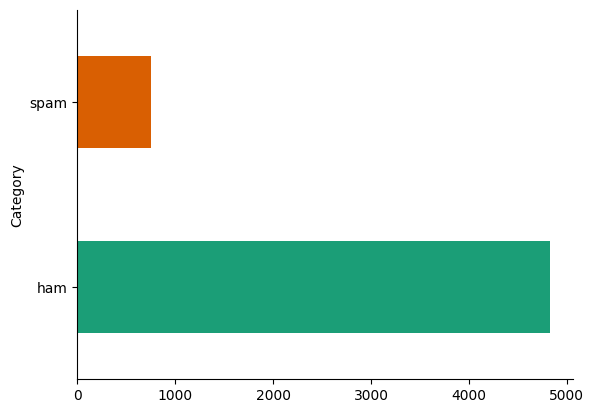

In [7]:
# Title Category

from matplotlib import pyplot as plt
import seaborn as sns

category_counts.plot(kind="barh", color=sns.color_palette("Dark2"))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [8]:
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

Label Encoding

In [9]:
# label spam mail as 0; ham mail as 1

mail_df.loc[mail_df["Category"] == "spam", "Category"] = 0
mail_df.loc[mail_df["Category"] == "ham", "Category"] = 1

In [10]:
mail_df.head(10)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...


In [11]:
# separating the data as texts and label

X = mail_df["Message"]
Y = mail_df["Category"]

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training and test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [17]:
# Transform the text data to feature vectors that can be used as input to the logisticRegression

features = TfidfVectorizer(min_df = 1, stop_words="english", lowercase=True)

X_train_features = features.fit_transform(X_train)

X_test_features = features.transform(X_test)

# Convert Y_train and Y_test values as integers
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [22]:
print(X_train)

5426        Oh yeah! And my diet just flew out the window
4724                     HELLO PEACH! MY CAKE TASTS LUSH!
536     Good afternoon, my love! How goes that day ? I...
3488                        Change windows logoff sound..
2551    Please sen :)my kind advice :-)please come her...
                              ...                        
1697    Sorry man, my stash ran dry last night and I c...
422     Someone has contacted our dating service and e...
4007    IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...
3474                      You getting back any time soon?
3074           Somebody should go to andros and steal ice
Name: Message, Length: 4457, dtype: object


In [23]:
print(X_train_features)

  (0, 7289)	0.517250079608171
  (0, 2823)	0.517250079608171
  (0, 3764)	0.22046319970004674
  (0, 2262)	0.4931693086193514
  (0, 7438)	0.2996693624522655
  (0, 4768)	0.28858793133473676
  (1, 4136)	0.4717788963273522
  (1, 6517)	0.49481520325330863
  (1, 1558)	0.4236400720998954
  (1, 4972)	0.49481520325330863
  (1, 3317)	0.32904344933475643
  (2, 5798)	0.2821824162510531
  (2, 3835)	0.2623708342584191
  (2, 4943)	0.33789703751914013
  (2, 5837)	0.1845655907506494
  (2, 1430)	0.28509060215711635
  (2, 6641)	0.20096909705626312
  (2, 3722)	0.24768901862403342
  (2, 3935)	0.3671145612703168
  (2, 3118)	0.18009671431232455
  (2, 4269)	0.2543939099135892
  (2, 3398)	0.20665621299033204
  (2, 2136)	0.180851695270251
  (2, 3086)	0.27449720225122765
  (2, 4099)	0.186263215205624
  :	:
  (4454, 5765)	0.27366476899994313
  (4454, 4205)	0.27366476899994313
  (4454, 6404)	0.2834859847167938
  (4454, 387)	0.2598225428978842
  (4454, 865)	0.26604684225670366
  (4454, 2972)	0.2598225428978842
  (445

Training The Model

Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the training model

In [28]:
# Prediction on trainig data

prediction_train_data = model.predict(X_train_features)
accuracy_train_data = accuracy_score(Y_train, prediction_train_data)

In [31]:
print("Accuracy of training data: ", accuracy_train_data)

Accuracy of training data:  0.9672425398249944


In [32]:
# prediction on test data

prediction_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(Y_test, prediction_test_data)

In [35]:
print("Accuracy of test data: ",accuracy_test_data)

Accuracy of test data:  0.9704035874439462


Building a Predictive System

In [47]:
input_mail = ["Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!"]

# Convert text as feature vectors
input_data_features = features.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0] == 0):
  print("Spam mail")
else:
  print("ham mail")

[1]
ham mail
